# Arabica Coffee Quality - What factors and elements can get you the best coffee?

## Import packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [3]:
coffee = pd.read_csv("./arabica_data_cleaned.csv")

In [4]:
coffee.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## get list of column names to keep columns I'll be working with

In [5]:
list(coffee)

['Unnamed: 0',
 'Species',
 'Owner',
 'Country.of.Origin',
 'Farm.Name',
 'Lot.Number',
 'Mill',
 'ICO.Number',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number.of.Bags',
 'Bag.Weight',
 'In.Country.Partner',
 'Harvest.Year',
 'Grading.Date',
 'Owner.1',
 'Variety',
 'Processing.Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean.Cup',
 'Sweetness',
 'Cupper.Points',
 'Total.Cup.Points',
 'Moisture',
 'Category.One.Defects',
 'Quakers',
 'Color',
 'Category.Two.Defects',
 'Expiration',
 'Certification.Body',
 'Certification.Address',
 'Certification.Contact',
 'unit_of_measurement',
 'altitude_low_meters',
 'altitude_high_meters',
 'altitude_mean_meters']

## Keeping following columns: 'Owner', 'Country.of.Origin', 'Region', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters'

In [6]:
coffee1 = coffee[['Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters']]

In [7]:
coffee1.head()

,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
2,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,1700.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0


## Remove rows with NaN

In [8]:
coffee2 = coffee1.dropna()

In [9]:
coffee2.head()

,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0
9,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,1822.5


## Find column types

In [10]:
print(coffee2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1005 non-null   object 
 1   Processing.Method     1005 non-null   object 
 2   Aroma                 1005 non-null   float64
 3   Flavor                1005 non-null   float64
 4   Aftertaste            1005 non-null   float64
 5   Acidity               1005 non-null   float64
 6   Body                  1005 non-null   float64
 7   Balance               1005 non-null   float64
 8   Uniformity            1005 non-null   float64
 9   Clean.Cup             1005 non-null   float64
 10  Sweetness             1005 non-null   float64
 11  Cupper.Points         1005 non-null   float64
 12  Total.Cup.Points      1005 non-null   float64
 13  altitude_mean_meters  1005 non-null   float64
dtypes: float64(12), object(2)
memory usage: 117.8+ KB
None


## Find column values for Country.of.Origin and Processing.Method to change from string value

In [11]:
print(coffee2['Country.of.Origin'].unique())

['Ethiopia' 'Colombia' 'China' 'Costa Rica' 'Mexico' 'Brazil' 'Uganda'
 'Taiwan' 'Kenya' 'Thailand' 'Panama' 'Guatemala' 'Papua New Guinea'
 'El Salvador' 'Indonesia' 'Tanzania, United Republic Of' 'Honduras'
 'Japan' 'Nicaragua' 'Ecuador' 'United States (Puerto Rico)' 'Haiti'
 'Burundi' 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia'
 'Myanmar' 'Cote dIvoire' 'Peru']


In [12]:
print(coffee2['Processing.Method'].unique())

['Washed / Wet' 'Natural / Dry' 'Pulped natural / honey'
 'Semi-washed / Semi-pulped' 'Other']


## Recode Country.of.Origin and Processing.Method creating new columns

In [13]:
def method_recode (series):
    if series == "Washed / Wet":
        return 0
    if series == "Natural / Dry":
        return 1    
    if series == "Pulped natural / honey":
        return 2
    if series == "Semi-washed / Semi-pulped":
        return 3
    if series == "Other":
        return 4

In [14]:
coffee2['Processing.MethodR'] = coffee2['Processing.Method'].apply(method_recode)

C:\Users\timca\AppData\Local\Temp\ipykernel_21508\2526460805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee2['Processing.MethodR'] = coffee2['Processing.Method'].apply(method_recode)


In [15]:
def country_recode (series):
    if series == "Ethiopia":
        return 0
    if series == "Colombia":
        return 1    
    if series == "China":
        return 2
    if series == "Costa Rica":
        return 3
    if series == "Mexico":
        return 4
    if series == "Brazil":
        return 5
    if series == "Uganda":
        return 6
    if series == "Taiwan":
        return 7
    if series == "Kenya":
        return 8
    if series == "Thailand":
        return 9
    if series == "Panama":
        return 10
    if series == "Guatemala":
        return 11
    if series == "Papua New Guinea":
        return 12
    if series == "El Salvador":
        return 13
    if series == "Indonesia":
        return 14
    if series == "Tanzania, United Republic Of":
        return 15
    if series == "Honduras":
        return 16
    if series == "Japan":
        return 17
    if series == "Nicaragua":
        return 18
    if series == "Ecuador":
        return 19
    if series == "United States (Puerto Rico)":
        return 20
    if series == "Haiti":
        return 21
    if series == "Burundi":
        return 22
    if series == "Vietnam":
        return 23
    if series == "Philippines":
        return 24
    if series == "Rwanda":
        return 25
    if series == "Malawi":
        return 26
    if series == "Laos":
        return 27
    if series == "Zambia":
        return 28
    if series == "Myanmar":
        return 29
    if series == "Cote dIvoire":
        return 30
    if series == "Peru":
        return 31
    

In [16]:
coffee2['Country.of.OriginR'] = coffee2['Country.of.Origin'].apply(country_recode)

C:\Users\timca\AppData\Local\Temp\ipykernel_21508\2391824291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee2['Country.of.OriginR'] = coffee2['Country.of.Origin'].apply(country_recode)


In [17]:
coffee2.head()

,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters,Processing.MethodR,Country.of.OriginR
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0,0,0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0,0,0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0,1,0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0,0,0
9,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,1822.5,1,0


In [18]:
print(coffee2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1309
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1005 non-null   object 
 1   Processing.Method     1005 non-null   object 
 2   Aroma                 1005 non-null   float64
 3   Flavor                1005 non-null   float64
 4   Aftertaste            1005 non-null   float64
 5   Acidity               1005 non-null   float64
 6   Body                  1005 non-null   float64
 7   Balance               1005 non-null   float64
 8   Uniformity            1005 non-null   float64
 9   Clean.Cup             1005 non-null   float64
 10  Sweetness             1005 non-null   float64
 11  Cupper.Points         1005 non-null   float64
 12  Total.Cup.Points      1005 non-null   float64
 13  altitude_mean_meters  1005 non-null   float64
 14  Processing.MethodR    1005 non-null   int64  
 15  Country.of.OriginR   

## Reorder Columns

In [19]:
coffee2 = coffee2[['Country.of.Origin', 'Country.of.OriginR', 'Processing.Method', 'Processing.MethodR', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters']]

# ------------------------------------------------------------------------------------------------------------------

## Create Correlation Matrix
### Remove non-continuous columns

In [20]:
coffee3 = coffee2.drop(['Country.of.Origin', 'Processing.Method'], axis=1)

In [21]:
coffee3.head()

,Country.of.OriginR,Processing.MethodR,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters
0,0,0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
1,0,0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
3,0,1,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
4,0,0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0
9,0,1,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,1822.5


## Run Pearson correlation matrix

In [22]:
coffee3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlOrBr'), axis=1)

,Country.of.OriginR,Processing.MethodR,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters
Country.of.OriginR,1.0,0.0046,-0.16,-0.19,-0.23,-0.16,-0.16,-0.2,-0.043,-0.0084,-0.091,-0.19,-0.18,-0.019
Processing.MethodR,0.0046,1.0,0.013,0.075,0.073,-0.015,0.06,0.073,-0.0075,0.042,-0.025,0.048,0.048,-0.19
Aroma,-0.16,0.013,1.0,0.73,0.68,0.6,0.55,0.61,0.14,0.2,0.09,0.62,0.68,0.22
Flavor,-0.19,0.075,0.73,1.0,0.85,0.75,0.69,0.73,0.22,0.3,0.18,0.78,0.84,0.19
Aftertaste,-0.23,0.073,0.68,0.85,1.0,0.69,0.69,0.76,0.24,0.32,0.19,0.78,0.84,0.17
Acidity,-0.16,-0.015,0.6,0.75,0.69,1.0,0.62,0.64,0.19,0.17,0.11,0.65,0.71,0.24
Body,-0.16,0.06,0.55,0.69,0.69,0.62,1.0,0.7,0.13,0.14,0.086,0.64,0.67,0.17
Balance,-0.2,0.073,0.61,0.73,0.76,0.64,0.7,1.0,0.24,0.26,0.16,0.72,0.78,0.16
Uniformity,-0.043,-0.0075,0.14,0.22,0.24,0.19,0.13,0.24,1.0,0.38,0.36,0.21,0.51,0.052
Clean.Cup,-0.0084,0.042,0.2,0.3,0.32,0.17,0.14,0.26,0.38,1.0,0.43,0.28,0.63,0.05


## Recode Country.of.Origin column by region to lower number of variable levels to see if correlation of will change between Processing Method and Region vs Country
### Africa = 0, Central America = 1, Asia = 2, South America = 3, Mexico = 4

In [41]:
def region_recode (series):
    if series == "Ethiopia":
        return 0
    if series == "Colombia":
        return 3    
    if series == "China":
        return 2
    if series == "Costa Rica":
        return 1
    if series == "Mexico":
        return 4
    if series == "Brazil":
        return 3
    if series == "Uganda":
        return 0
    if series == "Taiwan":
        return 2
    if series == "Kenya":
        return 0
    if series == "Thailand":
        return 2
    if series == "Panama":
        return 1
    if series == "Guatemala":
        return 1
    if series == "Papua New Guinea":
        return 2
    if series == "El Salvador":
        return 1
    if series == "Indonesia":
        return 2
    if series == "Tanzania, United Republic Of":
        return 0
    if series == "Honduras":
        return 1
    if series == "Japan":
        return 2
    if series == "Nicaragua":
        return 1
    if series == "Ecuador":
        return 1
    if series == "United States (Puerto Rico)":
        return 1
    if series == "Haiti":
        return 1
    if series == "Burundi":
        return 0
    if series == "Vietnam":
        return 2
    if series == "Philippines":
        return 2
    if series == "Rwanda":
        return 0
    if series == "Malawi":
        return 0
    if series == "Laos":
        return 2
    if series == "Zambia":
        return 0
    if series == "Myanmar":
        return 2
    if series == "Cote dIvoire":
        return 0
    if series == "Peru":
        return 3

In [42]:
coffee2['RegionR'] = coffee2['Country.of.Origin'].apply(region_recode)

## Create column for RegionR with name of region

In [43]:
def regionName_recode (series):
    if series == 0:
        return "Africa"
    if series == 1:
        return "Central America"   
    if series == 2:
        return "Asia"
    if series == 3:
        return "South America"
    if series == 4:
        return "Mexico"

In [44]:
coffee2['Region.Name'] = coffee2['RegionR'].apply(regionName_recode)

In [27]:
coffee2.head()

,Country.of.Origin,Country.of.OriginR,Processing.Method,Processing.MethodR,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters,RegionR,Region.Name
0,Ethiopia,0,Washed / Wet,0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0,0,Africa
1,Ethiopia,0,Washed / Wet,0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0,0,Africa
3,Ethiopia,0,Natural / Dry,1,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0,0,Africa
4,Ethiopia,0,Washed / Wet,0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0,0,Africa
9,Ethiopia,0,Natural / Dry,1,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,1822.5,0,Africa


## Reorder Columns

In [28]:
coffee2 = coffee2[['Country.of.Origin', 'Country.of.OriginR', 'Region.Name', 'RegionR', 'Processing.Method', 'Processing.MethodR', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters']]

## Export dataset as csv 

In [45]:
coffee2.to_csv('./coffee2.csv') 

## Run new Correlation Matrix removing country and using region
### Remove non-continuous and Country.of.OriginR 

In [46]:
coffee4 = coffee2.drop(['Country.of.Origin', 'Country.of.OriginR', 'Processing.Method', 'Region.Name'], axis=1)

In [47]:
coffee4.head()

,RegionR,Processing.MethodR,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters
0,0,0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,2075.0
1,0,0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,2075.0
3,0,1,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,2000.0
4,0,0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,2075.0
9,0,1,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,1822.5


In [48]:
coffee4.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlOrBr'), axis=1)

,RegionR,Processing.MethodR,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_mean_meters
RegionR,1.0,0.079,-0.18,-0.15,-0.14,-0.18,-0.13,-0.15,-0.091,-0.11,0.059,-0.13,-0.17,-0.21
Processing.MethodR,0.079,1.0,0.013,0.075,0.073,-0.015,0.06,0.073,-0.0075,0.042,-0.025,0.048,0.048,-0.19
Aroma,-0.18,0.013,1.0,0.73,0.68,0.6,0.55,0.61,0.14,0.2,0.09,0.62,0.68,0.22
Flavor,-0.15,0.075,0.73,1.0,0.85,0.75,0.69,0.73,0.22,0.3,0.18,0.78,0.84,0.19
Aftertaste,-0.14,0.073,0.68,0.85,1.0,0.69,0.69,0.76,0.24,0.32,0.19,0.78,0.84,0.17
Acidity,-0.18,-0.015,0.6,0.75,0.69,1.0,0.62,0.64,0.19,0.17,0.11,0.65,0.71,0.24
Body,-0.13,0.06,0.55,0.69,0.69,0.62,1.0,0.7,0.13,0.14,0.086,0.64,0.67,0.17
Balance,-0.15,0.073,0.61,0.73,0.76,0.64,0.7,1.0,0.24,0.26,0.16,0.72,0.78,0.16
Uniformity,-0.091,-0.0075,0.14,0.22,0.24,0.19,0.13,0.24,1.0,0.38,0.36,0.21,0.51,0.052
Clean.Cup,-0.11,0.042,0.2,0.3,0.32,0.17,0.14,0.26,0.38,1.0,0.43,0.28,0.63,0.05


In [68]:
coffee2['Region.Name'].value_counts()

Central America    287
South America      231
Mexico             225
Asia               143
Africa             119
Name: Region.Name, dtype: int64

<AxesSubplot:>

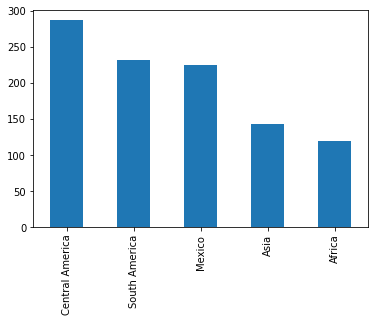

In [66]:
coffee2['Region.Name'].value_counts().plot(kind='bar')

In [60]:
coffee2['Processing.Method'].value_counts()

Washed / Wet                 738
Natural / Dry                179
Semi-washed / Semi-pulped     53
Other                         25
Pulped natural / honey        10
Name: Processing.Method, dtype: int64

<AxesSubplot:>

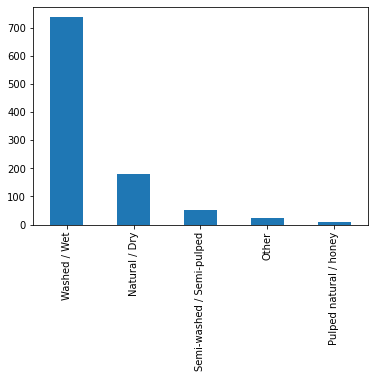

In [69]:
coffee2['Processing.Method'].value_counts().plot(kind='bar')